In [5]:
# 调用包从图像识别包中调用，图像标签，工具包
from image_sdk.utils import encode_to_base64
from image_sdk.image_tagging import image_tagging_aksk
from image_sdk.utils import init_global_env

# 调用json解析传回的结果
import json
# 操作系统文件/文件夹的包
import os
import shutil
# 图像处理展示相关的包
from PIL import Image
import matplotlib.pyplot as plt

# 设置相关参数

init_global_env('cn-north-4')

# 准备ak，sk
app_key = 'XUO17GA1BOS9QIDAQITJ'
app_secret = '4bkqFjm9LorzeZMtPxcwhWQmtJi3GMU6x0G9wHq3'

# 使用网络图像测试
demo_data_url = 'https://sdk-obs-source-save.obs.cn-north-4.myhuaweicloud.com/tagging-normal.jpg'
# call interface use the url
result = image_tagging_aksk(app_key, app_secret, '', demo_data_url, 'zh', 5, 30)
# 转化成Python字典形式
tags = json.loads(result)
print(tags)


{'error_code': 'ModelArts.4707', 'error_msg': 'Access denied to obtain the file /tagging-normal.jpg from the OBS.'}


In [7]:
# 设置相关参数

init_global_env('cn-north-4')

# 准备ak，sk
app_key = 'XUO17GA1BOS9QIDAQITJ'
app_secret = '4bkqFjm9LorzeZMtPxcwhWQmtJi3GMU6x0G9wHq3'
# 确定电子相册位置
file_path = 'data/'
file_name = 'pic3.jpg'

# 保存图片标签的字典
labels = {}

# 图像打标
result = image_tagging_aksk(app_key,app_secret,encode_to_base64(file_path+file_name),'','zh',5,60)

# 解析结果
result_dic  = json.loads(result)

# 保存到字典中
labels[file_name] = result_dic['result']['tags']
print(labels)


{'pic3.jpg': [{'confidence': '95.9', 'i18n_tag': {'en': 'Lion', 'zh': '狮子'}, 'tag': '狮子', 'type': 'object'}, {'confidence': '91.97', 'i18n_tag': {'en': 'Carnivora', 'zh': '食肉目'}, 'tag': '食肉目', 'type': 'object'}, {'confidence': '87.27', 'i18n_tag': {'en': 'Cat', 'zh': '猫'}, 'tag': '猫', 'type': 'object'}, {'confidence': '86.89', 'i18n_tag': {'en': 'Animal', 'zh': '动物'}, 'tag': '动物', 'type': 'object'}, {'confidence': '74.74', 'i18n_tag': {'en': 'Hairy', 'zh': '毛茸茸'}, 'tag': '毛茸茸', 'type': 'object'}]}


In [10]:
# 确定电子相册到位置
file_path = 'data/'

# 保存图片标签的字典
labels = {}

items = os.listdir(file_path)
for i in items:
    # 判断是否为文件，而不是文件夹
    if os.path.isfile:
        if i.endswith('jpg') or i.endswith('jpeg') or i.endswith('bmp') or i.endswith('png'):
            result = image_tagging_aksk(app_key,app_secret,encode_to_base64(file_path + i),'','zh',5,60)
            result_dic = json.loads(result)
            labels[i] = result_dic['result']['tags']

# 显示结果
print(labels)
print('   ')

# 将字典文件保存到文件
save_path = './label'

# 如果文件夹不存在则创建文件
if not os.path.exists(save_path):
    os.mkdir(save_path)

# 创建文件，执行写入操作，并关闭
with open(save_path+'/labels.json','w+') as f:
    f.write(json.dumps(labels))


# 打开刚刚保存的文件
label_path = './label/labels.json'
with open(label_path,'r') as f:
    labels = json.load(f)

# 搜索关键词
key_word = '花'
# 设置可信百分比
threshold = 60
# 设置一个集合
valid_list = set()

# 遍历labels中到字典获取所有包含关键字到图片名字
for k,v in labels.items():
    for item in v:
        if key_word in items['tag'] and float(item['confidence']) >= threshold:
            valid_list.add(k)

# 展示结果
valid_list = list(valid_list)
print(valid_list)

# 设置画布大小
plt.figure(24)
# 将每张图片依次排列到画布上
for k,v in enumerate(valid_list[:9]):
    pic_path = 'data/' + v
    img = Image.open(pic_path)
    img = img.resize((640,400))
    plt.subplot(331 + k)
    plt.axis('off')
    plt.imshow(img)

plt.show()

# 生成一个临时文件夹
if not os.path.exists('tmp'):
    os.mkdir('tmp')
# 将所有搜索到的图像转化为gif格式，并存储在临时文件夹中
gif_list = []
for k, pic in enumerate(valid_list):
    pic_path = 'data/' + pic
    img = Image.open(pic_path)
    img = img.resize((640,380))
    save_name = 'tmp/'+ str(k) + '.gif'
    img.save(save_name)
    gif_list.append(save_name)
# 打开已经所有静止的gif图片
images=[]
for i in gif_list:
    pic_path =    i
    images.append(Image.open(pic_path))
# 存储成动图gif
images[0].save('相册动图.gif',
               save_all=True,
               append_images=images[1:],
               duration=1000,loop=0)
# 释放内存
del images
# 删除临时文件
shutil.rmtree('tmp')

print('gif 相册制作完成')

# 打开保存到labels文件
label_path = './label/labels.json'
with open(label_path,'r') as f:
    labels = json.load(f)
print(labels)

# 获取置信度最高的文件分类
classes = [[v[0]['tag'],k]for k,v in labels.items()]

for cls in classes:
    if not os.path.exists('data/'+cls[0]):
        os.mkdir('data/'+cls[0])
    # 复制被对应的图片
    shutil.copy('data/'+cls[1],'data/'+cls[0]+'/'+cls[1])

print('已经复制完成！')


timeout: The read operation timed out

In [23]:

# 打标data文件夹下的所有照片
# 确定电子相册到位置
file_path = 'data/'

# 保存图片标签的字典
labels = {}

items = os.listdir(file_path)
for i in items:
    # 判断是否为文件，而不是文件夹
    if os.path.isfile:
        if i.endswith('jpg') or i.endswith('jpeg') or i.endswith('bmp') or i.endswith('png'):
            result = image_tagging_aksk(app_key,app_secret,encode_to_base64(file_path + i),'','zh',5,60)
            result_dic = json.loads(result)
            labels[i] = result_dic['result']['tags']

# 显示结果
print(labels)
print('   ')

# 显示结果
print(labels)
print('   ')

# 将字典文件保存到文件
save_path = './label'

# 如果文件夹不存在则创建文件
if not os.path.exists(save_path):
    os.mkdir(save_path)

# 创建文件，执行写入操作，并关闭
with open(save_path+'/labels.json','w+') as f:
    f.write(json.dumps(labels))

{'pic_fog.png': [{'confidence': '82.86', 'i18n_tag': {'en': 'House', 'zh': '房子'}, 'tag': '房子', 'type': 'object'}, {'confidence': '80.84', 'i18n_tag': {'en': 'Building', 'zh': '建筑'}, 'tag': '建筑', 'type': 'object'}, {'confidence': '74.65', 'i18n_tag': {'en': 'Plant', 'zh': '植物'}, 'tag': '植物', 'type': 'object'}, {'confidence': '73.35', 'i18n_tag': {'en': 'Green', 'zh': '绿色'}, 'tag': '绿色', 'type': 'object'}, {'confidence': '72.26', 'i18n_tag': {'en': 'Build', 'zh': '建设'}, 'tag': '建设', 'type': 'object'}], 'pic_super.png': [{'confidence': '98.62', 'i18n_tag': {'en': 'Person', 'zh': '人'}, 'tag': '人', 'type': 'object'}, {'confidence': '94.09', 'i18n_tag': {'en': 'Human face', 'zh': '人脸'}, 'tag': '人脸', 'type': 'object'}, {'confidence': '93.52', 'i18n_tag': {'en': 'Park', 'zh': '公园'}, 'tag': '公园', 'type': 'object'}, {'confidence': '89.91', 'i18n_tag': {'en': 'Summer', 'zh': '夏季'}, 'tag': '夏季', 'type': 'object'}, {'confidence': '89.66', 'i18n_tag': {'en': 'Fashion', 'zh': '时尚'}, 'tag': '时尚', 'typ

['pic7.jpg', 'pic5.jpg', 'pic10.jpg', 'pic9.jpg']


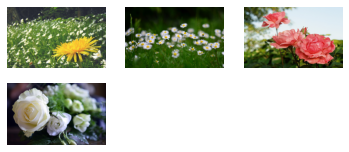

gif 相册制作完成
{'pic_fog.png': [{'confidence': '82.86', 'i18n_tag': {'en': 'House', 'zh': '房子'}, 'tag': '房子', 'type': 'object'}, {'confidence': '80.84', 'i18n_tag': {'en': 'Building', 'zh': '建筑'}, 'tag': '建筑', 'type': 'object'}, {'confidence': '74.65', 'i18n_tag': {'en': 'Plant', 'zh': '植物'}, 'tag': '植物', 'type': 'object'}, {'confidence': '73.35', 'i18n_tag': {'en': 'Green', 'zh': '绿色'}, 'tag': '绿色', 'type': 'object'}, {'confidence': '72.26', 'i18n_tag': {'en': 'Build', 'zh': '建设'}, 'tag': '建设', 'type': 'object'}], 'pic_super.png': [{'confidence': '98.62', 'i18n_tag': {'en': 'Person', 'zh': '人'}, 'tag': '人', 'type': 'object'}, {'confidence': '94.09', 'i18n_tag': {'en': 'Human face', 'zh': '人脸'}, 'tag': '人脸', 'type': 'object'}, {'confidence': '93.52', 'i18n_tag': {'en': 'Park', 'zh': '公园'}, 'tag': '公园', 'type': 'object'}, {'confidence': '89.91', 'i18n_tag': {'en': 'Summer', 'zh': '夏季'}, 'tag': '夏季', 'type': 'object'}, {'confidence': '89.66', 'i18n_tag': {'en': 'Fashion', 'zh': '时尚'}, 'tag':

In [24]:
# 打开刚刚保存的文件
label_path = './label/labels.json'
with open(label_path,'r') as f:
    labels = json.load(f)

# 搜索关键词
key_word = '花'
# 设置可信百分比
threshold = 60
# 设置一个集合
valid_list = set()

# 遍历labels中到字典获取所有包含关键字到图片名字
for k,v in labels.items():
    for item in v:
        if key_word in item['tag'] and float(item['confidence']) >= threshold:
            valid_list.add(k)

# 展示结果
valid_list = list(valid_list)
print(valid_list)

# 设置画布大小
plt.figure(24)
# 将每张图片依次排列到画布上
for k,v in enumerate(valid_list[:9]):
    pic_path = 'data/' + v
    img = Image.open(pic_path)
    img = img.resize((640,400))
    plt.subplot(331 + k)
    plt.axis('off')
    plt.imshow(img)

plt.show()

# 生成一个临时文件夹
if not os.path.exists('tmp'):
    os.mkdir('tmp')
# 将所有搜索到的图像转化为gif格式，并存储在临时文件夹中
gif_list = []
for k, pic in enumerate(valid_list):
    pic_path = 'data/' + pic
    img = Image.open(pic_path)
    img = img.resize((640,380))
    save_name = 'tmp/'+ str(k) + '.gif'
    img.save(save_name)
    gif_list.append(save_name)
# 打开已经所有静止的gif图片
images=[]
for i in gif_list:
    pic_path =    i
    images.append(Image.open(pic_path))
# 存储成动图gif
images[0].save('相册动图.gif',
               save_all=True,
               append_images=images[1:],
               duration=1000,loop=0)
# 释放内存
del images
# 删除临时文件
shutil.rmtree('tmp')

print('gif 相册制作完成')

# 打开保存到labels文件
label_path = './label/labels.json'
with open(label_path,'r') as f:
    labels = json.load(f)
print(labels)

# 获取置信度最高的文件分类
classes = [[v[0]['tag'],k]for k,v in labels.items()]

for cls in classes:
    if not os.path.exists('data/'+cls[0]):
        os.mkdir('data/'+cls[0])
    # 复制被对应的图片
    shutil.copy('data/'+cls[1],'data/'+cls[0]+'/'+cls[1])

print('已经复制完成！')
